## Lab 2 - Clustering

Trong Lab này, sinh viên sẽ rèn luyện cách cài đặt thuật toán K-mean và áp dụng thuật toán K-mean vào tập dữ liệu về ngân hàng.

Cập nhật lần cuối: 30/07/2022 

Họ tên: Nguyễn Nguyên Văn

MSSV: 21424068

&#127827; *Trong bài tập này, các bạn chỉ được phép sử dụng các thư viện Standard Python Library và numpy, pandas, matplotlib. Các thư viện hỗ trơ (đặc biệt là thư viện Sklearn, Keras, ) là không được phép.*

&#127802; Sinh viên lưu ý mình sẽ dùng chương trình hỗ trợ chấm bài nên bạn cần phải tuân thủ chính xác qui định mà mình đặt ra, nếu không rõ thì hỏi, chứ không nên tự tiện làm theo ý của cá nhân.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file Python notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:

```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```

Tất nhiên, khi làm thì bạn xóa dòng `raise NotImplementedError()` đi.
Đối những phần yêu cầu code thì thường ở ngay phía dưới sẽ có một (hoặc một số) cell chứa các bộ test để giúp bạn biết đã code đúng hay chưa; nếu chạy cell này không có lỗi gì thì có nghĩa là qua được các bộ test. Trong một số trường hợp, các bộ test có thể sẽ không đầy đủ; nghĩa là, nếu không qua được test thì là code sai, nhưng nếu qua được test thì chưa chắc đã đúng hoàn toàn.

Trong khi làm bài, bạn có thể cho in ra màn hình, tạo thêm các cell để test. Nhưng khi nộp bài thì bạn xóa các cell mà bạn tự tạo, xóa hoặc comment các câu lệnh in ra màn hình. Bạn lưu ý <font color=red>không được tự tiện xóa các cell hay sửa code của Thầy</font> (trừ những chỗ được phép sửa như đã nói ở trên).


Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.

Bạn có thể thảo luận ý tưởng với bạn khác hoặc từ các nguồn khác, nhưng code và bài làm phải là của bạn, dựa trên sự hiểu thật sự của bạn. Nếu vi phạm thì sẽ bị 0 điểm cho toàn bộ môn học.

**Cách nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart & Run All` để restart và chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Kernel` - `Restart & Run All` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (vd, nếu bạn có MSSV là 123 thì bạn đặt tên thư mục là `123`)
    - File `Lab 2 - Kmean - SV.ipynb`
- Các bạn nén lại MSSV.zip (*.zip chứ không phải .rar hay gì khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại và nộp ở link trên moodle. <font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài.</font>

# 1. Đọc và khám phá dữ liệu 

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Giới thiệu về dữ liệu về tập khách hàng của ngân hàng**
- Dữ liệu về tập khách hàng của ngân hàng được lưu vào file ```bank.csv```. 
<br>

- Bộ dữ liệu gồm hai cột: 
    + annual_income: thể hiện thu nhập hàng năm của khách hàng. (Đơn vị nghìn USD)
    + spending_socre: điểm tiêm dùng, được chấm dựa theo chi tiêu trong năm của khách hàng. (Đơn vị nghìn USD)
<br> 
    
    
- **Ngân hàng mong muốn dựa vào hai tiêu chí trên để phân chia tất cả các khách hàng thành 3 nhóm**, để mỗi nhóm có thể được chỉ định cho một người quản lý khác nhau.

- Nhiệm vụ của sinh viên, đọc dữ liệu ngân hàng, được lưu trong file ```bank.csv```. Dùng thư viện ```pandas```
- Sinh viên tham khảo hàm ```pandas.read_csv```
- Kết quả được lưu vào biến ```bank_df```

In [2]:
bank_df = pd.read_csv('bank.csv')

In [3]:
# TEST
assert bank_df.shape == (903, 2)

- Để có thể có cái nhìn rộng hơn về dữ liệu. Ta có thểm dùng hàm ```sample(10)```, để biểu diễn 10 dòng dữ liệu một cách ngẫu nhiên. Ngoài ra, bạn có thể tham khảo các hàm khác như ```describe(), head(), ...```

In [4]:
bank_df.sample(10)

,annual_income,spending_score
790,78.756366,35.994451
872,79.956547,46.953266
686,62.991254,45.737181
561,96.838345,83.972295
167,31.528165,63.794374
557,83.041032,76.937119
758,69.033096,36.636305
888,71.664792,32.941274
722,74.081117,38.508222
664,67.314874,39.438484


- Ngoài ra, ta cũng có thể sử dụng lệnh ```pandas.describe()``` được sử dụng để xem một số chi tiết thống kê cơ bản như phân vị, trung bình, std, v.v. của một DataFrame

In [5]:
bank_df.describe()

,annual_income,spending_score
count,903.000000,903.000000
mean,63.963292,61.615061
std,27.057446,23.218188
min,7.328044,9.951149
25%,35.715005,40.009135
50%,72.013811,60.795590
75%,84.014393,82.617294
max,210.156000,112.999618


- Một số nhận xét:
    + Về cơ bản, dữ liệu không có gì bất thường.
    + Ta nhìn vào cột count (số điểm dữ liệu). Cả hai cột đều bằng 903 (kích thước ban đầu của dữ liệu). Có nghĩa là dữ liệu không bị thiếu.

# 2. Chuẩn bị dữ liệu

- Ta sẽ biểu diễn dữ liệu và xem xét một cách tổng quan nhất.

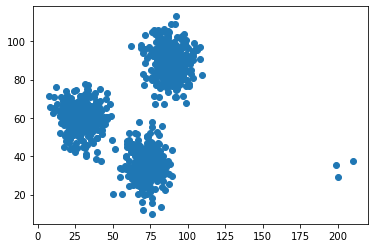

In [6]:
plt.scatter(bank_df["annual_income"], bank_df["spending_score"])

- Các bạn đưa ra nhận xét về dữ liệu. 
- Dữ liệu phân bố như thế nào? Tại sao lại áp dụng thuật toán phân cụm?
- Ta nên chọn giá trị K là bao nhiêu?
- Dữ liệu có điểm ngoại lai (outlier) không?

*YOUR ANSWER HERE*
- Có rất nhiều dữ liệu và chúng phân bố trong khoảng :
    - Từ 7 đến 211 đối với 'annual_income'
    - Từ 9 đến 113 đối với 'spending_score'
- Dễ thấy dữ liệu phân bố theo từng vùng tập trung theo nhóm (3 nhóm lớn và có 3 điểm lẻ).
- Vì dữ liệu tập trung thành các cụm lớn và rõ ràng rất phù hợp cho clustering
- Ta nên cho giá trị k = 3
- Sẽ có dữ liệu ngoại lai (cụ thể là 3 điểm)

## Loại bỏ dữ liệu ngoại lai (outlier)

- Sau khi biểu diễn dữ liệu, có vẻ ta thấy dữ liệu có vài điểm bất thường (cụ thể là 3 điểm). Nằm khá xa so với phần lớn dữ liệu. Cụ thể, các điểm dữ liệu ngoại lai có trục x (trục annual_income) có giá trị lớn bất thường. 
- Việc xác nhận/đánh giá các điểm dữ liệu outlier này, cần những kiến thức chuyên môn (expert domain). Ở đây, chúng ta sẽ giải quyết đơn giản bằng các xóa các điểm dữ liệu này. 

- Ở đây, ta sẽ sử dụng kỹ thuật "Inter-Quartile Range Method" để tìm ra điểm dữ liệu ngoại lai.
- Inter-Quartile Range (được viết tắt là IQR). IQR được tính bằng công thức 

$$
IQR = Q3 - Q1
$$

- Trong đó:
    + Q1: được gọi là 'first quartile' của dữ liệu. Nói cách khác, 25% dữ liệu, sẽ nhỏ hơn Q1.
    + Q3: được gọi là 'third quartile' của dữ liệu. Nói cách khác, 75% dữ liệu, sẽ nhỏ hơn Q3.
    
- Ta định nghĩa phạm vi quyết định (decision range), với công thức:
    + Giới hạn dưới: $ Q1 - 1.5 * IQR $
    + Giới hạn trên: $ Q3 + 1.5 * IQR $
    
- Các điểm dữ liệu nằm ngoài giới hạn dưới và giới hạn trên, được xem là điểm dữ liệu ngoại lai.

- **Mình vừa cung cấp lý thuyết về IQR và điểm dữ liệu ngoại lai. Bây giờ, ta sẽ áp dụng vào bài toán của chúng ta, để xóa đi các điểm dữ liệu ngoại lai.**
- Như đã phân tích bên trên, dữ liệu chúng ta chỉ bất thường ở trục x (truc ```annual_income```). Do đó, ta chỉ xét trục ```annual_income```. 


- Nhiệm vụ của sinh viên, tính các giá trị Q1, Q3, IQR và lưu vào các biến: ```q1_annual```, ```q3_annual```, ```iqr_annual```

In [7]:
q1_annual = None
q3_annual = None
iqr_annual = None

# YOUR CODE HERE
bank_np = np.array(bank_df["annual_income"])
q1_annual = np.quantile(bank_np,0.25)
q3_annual = np.quantile(bank_np,0.75)
iqr_annual = q3_annual - q1_annual
# raise NotImplementedError()

In [8]:
# TEST 
assert round(q1_annual) == 36
assert round(q3_annual) == 84
assert round(iqr_annual) == 48

- Tiếp theo, ta sẽ duyệt qua tất cả các điểm dữ liệu và kiểm tra xem. Điểm dữ liệu nào có giá trị thuộc tính ```annual_incom``` không nằm trong decision range. 
- Danh sách các điểm được lưu vào biến ```outlier_annual_list```. Trong đó ```outlier_annual_list``` là các một danh sách (list), với các phần tử là các số tương ứng biểu thị dòng dữ liệu được xem là ngoại lai.

In [9]:
outlier_annual_list = None

# YOUR CODE HERE
outlier_annual_list = []
index = 0
for i in bank_np:
    if i > q3_annual + 1.5*iqr_annual or i < q1_annual - 1.5*iqr_annual:
        outlier_annual_list.append(index)
    index += 1 
# raise NotImplementedError()

In [10]:
# TEST 
assert outlier_annual_list == [900, 901, 902]

- Cuối cùng, ta xóa các điểm dữ liệu có chỉ số (index), trong danh sách ```outlier_annual_list```
- Kết quả được cập nhật trực tiếp vào biến ```bank_df```.

In [11]:
bank_df = bank_df.drop(outlier_annual_list)

## Kiểm tra lại dữ liệu sau khi xử lý

- Đầu tiên, ta biểu diễn dữ liệu, để chắc chắn rằng mọi thứ vẫn bình thường?

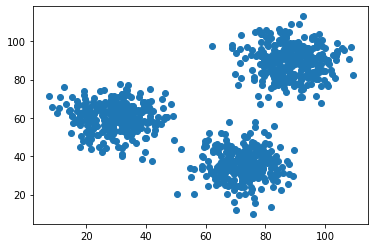

In [12]:
plt.scatter(bank_df["annual_income"], bank_df["spending_score"])

In [13]:
# TEST 
assert round(bank_df["annual_income"].max()) == 109
assert round(bank_df["annual_income"].min()) == 7

- Có vẻ dữ liệu đã ổn định hơn và các điểm ngoại lai đã biến mất. :)))

**Dữ liệu huấn luyện**
- Trong trường hợp này, ta sẽ dùng tất cả các điểm dữ liệu để phục vụ cho quá trình huấn luyện.
- Lý do ta không tách thành tập training và testing là vì, ta vốn dĩ không có nhãn của các điểm dữ liệu, do đó không thể kiểm tra lại độ chính xác sau khi huấn luyện. 

# 3. Cài đặt thuật toán K-mean

Trong phần này, chúng ta sẽ cài đặt thuật toán K-mean, dùng để phân cụm các nhóm khách hàng bên trên. 

**Nhắc lại về thuật toán K-mean**

- B1: chọn ngẫu nhiên k điểm dữ liệu làm điểm trung tâm (centroids).
- B2: tính khoảng cách (Euclidean), giữa tất cả các điểm dữ liệu và các điểm trung tâm. 
- B3: gán mỗi điểm dữ liệu cho tâm gần nhất theo khoảng cách tìm được.
- B4: cập nhật vị trí trung tâm bằng cách lấy giá trị trung bình của các điểm trong mỗi nhóm cụm.
- B5: lập lại từ B2 đến B4 cho đến khi các điểm trung tâm không thay đổi.

## Hàm tính khoảng cách

- Đầu tiên, ta sẽ cài đặt hàm tính khoảng cách giữa các điểm dữ liệu.
- Trong ví dụ này, ta sẽ sử dụng khoảng cách Euclidean. Với công thức: 
Gọi x là điểm có tọa độ là ($x_1$, $x_2$, ..., $x_n$), y có tọa độ là ($y_1$, $y_2$, ..., $y_n$). Khoảng cách giữa hai điểm x, y được định nghĩa:

$$d(x, y) = \sqrt{ (x_1 - y_1)^2 + (x_2 - y_2)^2 + ... +  (x_n - y_n)^2} $$

- Nhiệm vụ của sinh viên, hàm thành hàm ```euclidean_distance``` bên dưới. *Gợi ý, sinh viên có thể tham khảo hàm numpy.linalg.norm*

In [14]:
def euclidean_distance(x, y):
    """
    Function calculate the euclidean distance between two data point x and y
    
    * Parameter:
    
    x -- 1D numpy array, the first data point
    y -- 1D numpy array, the second data point
    
    * Return:
    dist -- a number, indicate the result distance 
    """
    
    dist = None
    
    # YOUR CODE HERE
    #dist = np.sum(np.sqrt((x-y)**2))
    dist =  np.linalg.norm(x-y)
    #raise NotImplementedError()
    return dist

In [15]:
# TEST
x = np.array([1, 1])
y = np.array([1, -3])
assert euclidean_distance(x, y) == 4

## Bước 1: chọn ngẫu nhiên k điểm dữ liệu làm điểm trung tâm (centroids)

- Trong phần này, nhiệm vụ của sinh viên là cài đặt hàm ```kmean_init_centroids```. Hàm có nhiệm vụ khởi tạo K các điểm trung tâm ban đầu. 

In [16]:
def kmean_init_centroids(X, k):
    """
    Function to intialize of centroids
    
    * Parameters:
    X -- a 2D numpy array, the dataset
    k -- a number, indicate the number of clusters
    
    * Returns:
    centroids -- a 2D numpy array, indicate K centroid
    """
    
    centroids = None
    # YOUR CODE HERE
#     centroids =[]
    centroids = X[np.random.choice(X.shape[0],k)]
#     for i in range(len(index_rd)):
#         tem = int(index_rd[i])
#         centroids.append(X[tem])
#     centroids = np.array(centroids)
    #raise NotImplementedError()
    return centroids


In [17]:
# TEST 
X = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]).T
k = 3 
assert kmean_init_centroids(X, k).shape == (3, 1) 

## B2: tính khoảng cách, giữa tất cả các điểm dữ liệu và các điểm trung tâm

- Sinh viên hoàn thành hàm ```kmean_matrix_distance```. Hàm có nhiệm vụ tính khoảng cách giữa tất cả các điểm dữ liệu (X) và K điểm trung tâm (centroids). 
- Kết quả trả về của hàm là một ma trận khoảng cách (biến ```matrix_distances```) với kích thước ma trận là (N, k). Ví dụ: ```matrix_distances[i, j]``` nghĩa là khoảng cách giữa điểm thứ i trong tập dữ liệu và điểm thứ j trong tập centroids.

In [18]:
def kmean_matrix_distance(X, centroids):
    """
    Function calculate the distance between every point in the dataset with the centroids.
    
    * Parameters:
    X -- a 2D numpy array, indicate the dataset
    centroids -- a 2D numpy array, indicate K centroids
    
    * Returns:
    pair_distances -- a 2D numpy array, with shape (N, k). Indicate the distance between every point with K centroids.
    """
    
    matrix_distances = None
    N = X.shape[0]
    k = centroids.shape[0]

    # YOUR CODE HERE
    matrix_distances = []
    for i in range(N):
        temp = []
        for j in range(k):
            temp.append(euclidean_distance(X[i],centroids[j]))
        matrix_distances.append(temp)
    #raise NotImplementedError()
    matrix_distances = np.array(matrix_distances)
    return matrix_distances

In [19]:
# TEST 
X_test = np.array([[1, -1],\
                   [1, 1],\
                   [1, 3]])

centroids_test = np.array([[1, 0],\
                           [1, 4]])

matrix_distance_test = kmean_matrix_distance(X_test, centroids_test)
assert (matrix_distance_test == np.array([[1., 5.], [1., 3.], [3., 1.]])).all() == True

## B3: gán mỗi điểm dữ liệu cho tâm gần nhất theo khoảng cách tìm được

- Nhiệm vụ của sinh viên, cài đặt hàm ```kmean_assign_centroids```. Hàm có nhiệm vụ, nhận vào ma trận khoảng cách (biến matrix_distances) và gán nhãn (biến labels) cho các điểm dữ liệu theo tâm gần nhất).

In [20]:
def kmean_assign_centroids(matrix_distances):
    """
    Function assign each data point to the closest centroid according to the distance found.
    
    * Parameters:
    matrix_distances -- a 2D array, with shape (N, k), indicate distance between X and centroids.
    
    * Return:
    labels -- a 1D numpy array, with shape (N,). Indicate the label of every data point in the dataset X.
    """
    
    labels = None
    # YOUR CODE HERE
#     labels = []
#     min_local = 9999999
#     for i in matrix_distance_test:
#         for j in centroids_test:
#             min_real = min_local
#             min_local = min(euclidean_distance(i[0],j[0]),euclidean_distance(i[1],j[1]))
#         labels.append(min(min_real,min_local))
#     labels = np.array(labels)
    labels = np.argmin(matrix_distances, axis = 1)
    # return index of the closest center
    #raise NotImplementedError()
    
    return labels

In [21]:
# TEST
matrix_distance_test = np.array([[1., 5.], [1., 3.], [3., 1.]])
labels_test = kmean_assign_centroids(matrix_distance_test)
assert (labels_test == np.array([0, 0, 1])).all() == True

## B4: cập nhật vị trí trung tâm bằng cách lấy giá trị trung bình của các điểm trong mỗi nhóm cụm.

In [22]:
def kmeans_update_centroids(X, labels, K):
    """
    Function updata centroids by taking the mean of the points in each cluster.
    
    * Parameters:
    X -- a 2D numpy array. 
    labels -- a 2D numpy array, with shape (N, 1). Indicate the label of every data point in the dataset X.
    k -- a number, indicate the number of cluster.
    
    * Returns:
    new_centroids -- a 2D numpy array, indicate the new centroids, which is computed by taking the average of each cluster.
    """
    
    new_centroids = None
    
    # YOUR CODE HERE
    new_centroids = np.zeros(K*X.shape[1]).reshape(K,-1)
    for i in range(K):
            temp = X[labels == i, :]
            new_centroids[i,:] = np.mean(temp, axis = 0)
    #raise NotImplementedError()
        
    return new_centroids

In [23]:
# TEST
X_test = np.array([[1, -1],\
                   [1, 1],\
                   [1, 3]])

labels_test = np.array([0, 0, 1])

new_centroids_test = kmeans_update_centroids(X_test, labels_test, 2)
assert  (new_centroids_test == np.array([[1., 0.], [1., 3.]])).all() == True

## Hàm kiểm tra hội tụ

- Ta cần kiểm tra xem, thuật toán K-mean đã đạt được điều kiện dừng chưa. Điều kiện dừng ở đây ta xét là điểm trung tâm mới và điểm trung tâm cũ không thay đổi.
- Nhiêm vụ của sinh viên, cài đặt hàm ```has_converged```. Hàm có nhiệm vụ kiểm tra xem ```centroids``` và ```new_centroids``` có giống nhau không. Hàm trả về **True** nếu giống nhau, ngược lại là **False**.

In [24]:
def has_converged(centroids, new_centroids):
    """
    Function to check whether centroids and new_centroids are the same
    
    * Parameters:
    centroids -- a 2D numpy array, indicate K centroid (old centroids)
    new_centroids -- a 2D numpy array, indicate K centroid (new centroids)
    
    * Return:
    is_converged -- True/False corresponding
    """
    is_converged = None
    # YOUR CODE HERE
    is_converged = (set([tuple(a)for a in centroids])==set([tuple(b)for b in new_centroids]))
    #raise NotImplementedError()
    return is_converged

In [25]:
current_centroids = np.array([[1, 0],\
                              [1, 4]])

new_centroids_1 = np.array([[1, 0],\
                            [1, 4]])

new_centroids_2 = np.array([[100, 100],\
                            [100, 100]])

assert has_converged(current_centroids, new_centroids_1) == True
assert has_converged(current_centroids, new_centroids_2) == False


## Cài đặt thuật toán K-mean hoàn chỉnh

- Sau khi đã hoàn thành các hàm hỗ trợ bên trên, ta đã có thể lắp ghép và cài đặt thuật toán K-mean hoàn chỉnh.
- Thông thường, đối với các thuật toán không biết số lần lập, người ta thường cho thuật toán lặp với một số lần nhất định (điều kiện dừng). Ở đây, ta sẽ cho thuật toán lặp tối đa 200 lần. 
- Nhiệm vụ của sinh viên: cài đặt hoàn chỉnh hàm ```kmeans_func``` bên dưới.

In [26]:
def kmeans_func(X, k, max_iterations):
    """
    Function implement Kmean algorithm
    
    * Parameters:
    X -- 
    k -- a number, indicate number of clusters
    
    * Return:
    centroids -- a 2D numpy array, indicate K centroid
    """
    
    centroids = None
    
    # Step 1 -- call "kmean_init_centroids" function
    
    # YOUR CODE HERE
    centroids = kmean_init_centroids(X,k)
    #raise NotImplementedError()
    for i in range(max_iterations):
        
        # Step 2  -- call "kmean_matrix_distance" function
        
        # YOUR CODE HERE
        distance = kmean_matrix_distance(X,centroids)
        #raise NotImplementedError()

        # Step 3 -- call "kmean_assign_centroids" function
        # YOUR CODE HERE
        centroids = kmean_assign_centroids(distance)
        #raise NotImplementedError()

        # Step 4 -- call "kmeans_update_centroids" function
        new_centroids = kmeans_update_centroids(X,centroids,k)
        # YOUR CODE HERE
        #raise NotImplementedError()
        # Check stop condition 
        if has_converged([centroids], new_centroids):
            break
        else:
            centroids = new_centroids
    
    return centroids

- Sau khi đã thực cài đặt xong hàm K-mean. Ta thực hiện việc huấn luyện.
- Ở đây, mình sử dụng câu lệnh ```bank_df.to_numpy()```. Bởi vì ```bank_df``` là một DataFrame của pandas, tuy nhiên đầu vào của chúng ta là mảng numpy 2D. Do đó ta cần sử dụng hàm ```to_numpy()``` để chuyển về mảng 2D numpy.

In [27]:
data = bank_df.to_numpy()
k = 3
max_iterations = 200

In [28]:
centroids = kmeans_func(data, k, max_iterations)
print(centroids)

[[88.42428581 89.09232893]
 [29.89477131 60.31080598]
 [72.17990838 35.71752127]]


## Giá trị chính xác của centroids:
- Tùy vào cách cài đặt và giá trị ngẫu nhiên. Tuy nhiên điểm centroids chính xác phải xấp xỉ (thứ tự không quan trọng): 
    + [20, 60],
    + [72, 36],
    + [88, 90]
    
- Nếu khác xa so với các số trên (quá 5 đơn vị) là các bạn đã cài đặt sai. Cần xem lại.

## Biển diễn centroids sau khi huấn luyện

- Ở phần này, mình sẽ giúp các bạn. Các bạn cũng tham khảo đoạn code bên dưới, để làm phần 4 (Dự đoán trên tập dữ liệu mới).
- Nếu thuật toán chính xác, kết quả sẽ là như thế này (tương đối):
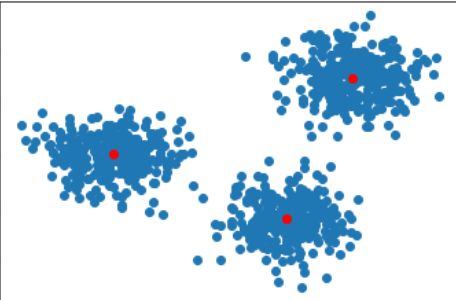

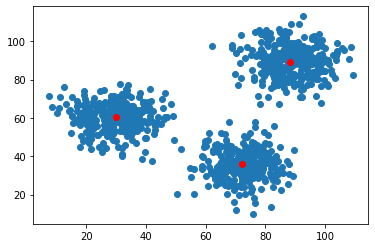

In [29]:
plt.scatter(bank_df["annual_income"], bank_df["spending_score"])
for centroid in centroids:
    plt.plot(centroid[0], centroid[1], 'ro')

# 4. Dự đoán trên tập dữ liệu mới

## Dự đoán

- Sau khi hoàn thành quá trình gom nhóm, ta có thể áp dụng để phân nhóm một khách hàng mới vào một nhóm cụ thể. 

- Trong phần này, nhiệm vụ của sinh viên gồm: 
    + Cho dữ liệu về khách hàng mới có thuộc tính: ```annual_income_test=40, spending_score_test=50```.
    + Kết quả phân nhóm được lưu trong biến ```predict_cluster```
    
    
- Quy ước các cụm (sắp xếp theo annual_income):
    + [20, 60] -- cụm 0
    + [72, 36] -- cụm 1
    + [88, 90] -- cum 2
    
    
- **Lưu ý, tọa độ chính xác của các cụm các bạn phải thiết lập lại dựa vào kết quả các bạn huấn luyện mô hình - các bạn sửa biến ```cluster``` bên dưới**. Và có thể lưu trong một dictionary. Để cho mọi việc đơn giản, các bạn được phép cài đặt cứng giá trị các ```cluster```. Ví dụ, của mình sẽ là: 

```python
cluster = {(29.89477131, 60.31080598): 0, 
             (72.17990838, 35.71752127): 1,
             (88.4242858, 89.09232893): 2}
```

In [30]:
cluster = {(29.89477131, 60.31080598): 0, 
           (72.17990838, 35.71752127): 1,
           (88.4242858, 89.09232893): 2}

annual_income_test = 40
spending_score_test = 50
testing_data = np.array([annual_income_test, spending_score_test])
predict_cluster = None

In [31]:
def predict_cluster(cluster, testing_data):
    """
    Function to predict testing_data in what cluster
    
    * Parameter:
    cluster -- a dictionary, indicate the centroids and the name of the cluster
    testing_data -- a 1D numpy array, indicate new data point
    
    * Return:
    predict_result -- a number, indicate the predicting cluster of testing_data
    """
    
    predict_result = None

    # YOUR CODE HERE

    temp = []
    for i in cluster:
        temp.append(euclidean_distance(np.array(i),testing_data))
    euclidean = np.min(temp)
    for i in cluster:
        if euclidean_distance(np.array(i),testing_data) == np.min(temp):
            predict_result = cluster[i]
    #raise NotImplementedError()
    
    return predict_result

In [32]:
assert predict_cluster(cluster, testing_data) == 0

## Biểu diễn

- Biểu diễn điểm dữ liệu lên đồ thị. Lưu ý, biểu diễn như thế nào là tùy bạn cũng không cần quá đặc sắc, nhưng phải đảm bảo nhìn vào đồ thị là thấy được (ví dụ: màu khác chẳng hạn).

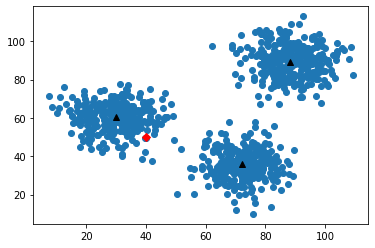

In [33]:
plt.scatter(bank_df["annual_income"], bank_df["spending_score"])
for centroid in centroids:
    plt.plot(centroid[0], centroid[1], 'k^')
plt.plot(testing_data[0],testing_data[1],'rD')
plt.show()